In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import SVC
import os
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install Augmentor

In [ ]:
!pip install opencv-python

In [ ]:
!pip install scikit-learn

In [ ]:
pip install scikit-image scikit-learn matplotlib

In [ ]:
cv2.__version__

'4.7.0'

**TAHAP PRE-PROCESSED**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_dir = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'  # Ganti dengan jalur direktori dataset Anda

# Inisialisasi objek ImageDataGenerator untuk augmentation dan preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Ubah sesuai kebutuhan Anda

# Memuat dataset dari direktori dan membagi menjadi training set dan test set
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Ubah sesuai ukuran gambar Anda
    batch_size=32,  # Ubah sesuai kebutuhan Anda
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Ubah sesuai ukuran gambar Anda
    batch_size=32,  # Ubah sesuai kebutuhan Anda
    class_mode='categorical',
    subset='validation'
)

# Menampilkan informasi jumlah data pada masing-masing set
print("Number of images in the training set:", len(train_generator.filenames))
print("Number of images in the test set:", len(test_generator.filenames))


Found 22414 images belonging to 7 classes.
Found 5602 images belonging to 7 classes.
Number of images in the training set: 22414
Number of images in the test set: 5602


**MENGUMPULKAN SAMPEL MENGGUNAKAN NUMPY**

In [ ]:
import os
import cv2
import numpy as np

# Path ke folder dataset
folder_path = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'

# Daftar kategori/emosi yang ada
categories = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Daftar dataset dan label
dataset = []
labels = []

# Memuat dataset
for category in categories:
    category_path = os.path.join(folder_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path)

        dataset.append(image)
        labels.append(category)

# Mengonversi daftar dataset dan label menjadi array NumPy
dataset = np.array(dataset)
labels = np.array(labels)

# Menampilkan informasi dataset
print("Jumlah dataset:", len(dataset))
print("Jumlah label:", len(labels))
print("Bentuk dataset:", dataset.shape)
print("Bentuk label:", labels.shape)

Jumlah dataset: 28016
Jumlah label: 28016
Bentuk dataset: (28016, 48, 48, 3)
Bentuk label: (28016,)


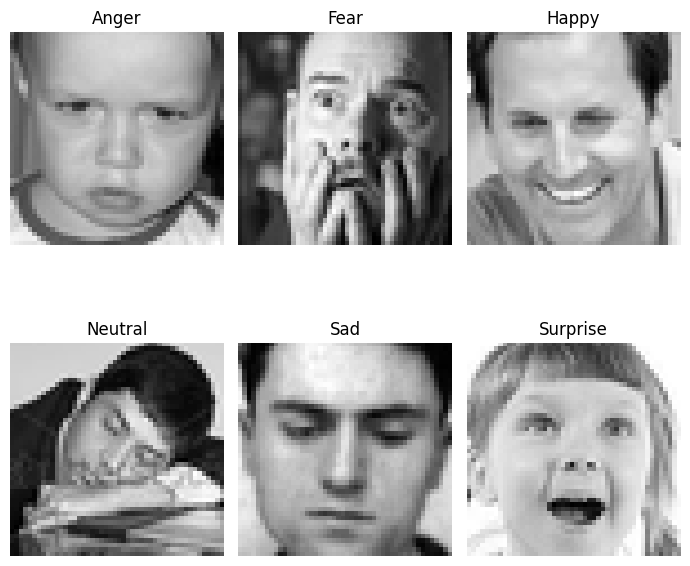

In [ ]:
import matplotlib.pyplot as plt
import os

dataset_dir = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'  # Ganti dengan path direktori dataset Anda

emotions = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

num_samples_per_class = 2  # Jumlah contoh gambar yang akan ditampilkan per kelas

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

for i, emotion in enumerate(emotions):
    class_dir = os.path.join(dataset_dir, emotion)
    image_files = os.listdir(class_dir)
    selected_images = image_files[:num_samples_per_class]

    for j, image_file in enumerate(selected_images):
        image_path = os.path.join(class_dir, image_file)
        img = plt.imread(image_path)

        ax = axs[i // 3, i % 3]
        ax.imshow(img)
        ax.set_title(emotion)
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os
from tabulate import tabulate

# Path ke direktori dataset
dataset_path = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'

# Daftar label
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Dictionary untuk menyimpan jumlah gambar per label
image_counts = {}

# Menginisialisasi jumlah gambar per label ke 0
for label in labels:
    image_counts[label] = 0

# Melakukan iterasi pada direktori dataset
for label in labels:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        # Menghitung jumlah gambar dalam direktori label
        image_counts[label] = len(os.listdir(label_path))

# Menampilkan tabel jumlah gambar per label
table = []
for label, count in image_counts.items():
    table.append([label, count])

headers = ["Label", "Jumlah Gambar"]
print(tabulate(table, headers, tablefmt="grid"))

+----------+-----------------+
| Label    |   Jumlah Gambar |
+==========+=================+
| Anger    |            3001 |
+----------+-----------------+
| Fear     |            5001 |
+----------+-----------------+
| Happy    |            5001 |
+----------+-----------------+
| Neutral  |            5001 |
+----------+-----------------+
| Sad      |            5001 |
+----------+-----------------+
| Surprise |            5011 |
+----------+-----------------+


In [ ]:
import os
import cv2
import numpy as np

def load_dataset(dataset_path):
    images = []
    labels = []

    # Loop through each label directory
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)

        if os.path.isdir(label_path):
            # Loop through each image file in the label directory
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                images.append(image)
                labels.append(label)

    # Convert images and labels to numpy arrays with dtype=object
    images = np.array(images, dtype=object)
    labels = np.array(labels)

    return images, labels

# Example usage
dataset_path = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'
images, labels = load_dataset(dataset_path)

# Print the shape of the loaded data
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (28017,)
Labels shape: (28017,)


Pada code di atas, terdapat proses untuk memuat dataset gambar ke dalam array numpy dan array label menggunakan metode pemrosesan gambar dengan bantuan pustaka OpenCV (cv2)

**Proses yang dilakukan dalam code tersebut adalah sebagai berikut :**
1. Mendefinisikan fungsi load_dataset yang menerima path dataset sebagai argumen.
2. Dalam fungsi load_dataset, dilakukan iterasi melalui setiap direktori label dalam dataset.
3. Di dalam setiap direktori label, dilakukan iterasi melalui setiap file gambar.
4. Setiap gambar dimuat menggunakan cv2.imread dan ditambahkan ke dalam array images.
5. Label setiap gambar ditambahkan ke dalam array labels.
6. Setelah semua gambar dan label dimuat, array images dan labels dikonversi menjadi array numpy menggunakan np.array

In [ ]:
import cv2
import numpy as np
import random

def augment_images(images, labels, augmentations_per_image):
    augmented_images = []
    augmented_labels = []
    for image, label in zip(images, labels):
        augmented_images.append(image)
        augmented_labels.append(label)
        # Menggunakan nilai desimal untuk probabilitas augmentasi setengah kali
        if random.random() < augmentations_per_image:
            augmented = image.copy()
            # Melakukan augmentasi secara acak pada gambar
            angle = random.randint(-20, 20)
            scale = random.uniform(0.8, 1.2)
            rows, cols, _ = augmented.shape
            rotation_matrix = cv2.getRotationMatrix2D((cols // 2, rows // 2), angle, scale)
            augmented = cv2.warpAffine(augmented, rotation_matrix, (cols, rows))
            augmented_images.append(augmented)
            augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

**EKSTRAKSI FITUR MENGGUNAKAN VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the VGG model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Preprocess the input image
img_path = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
preprocessed_input = preprocess_input(x)

# Get the features using the VGG model
features = base_model.predict(preprocessed_input)

# Print the shape of the features
print("Features shape:", features.shape)

1/1 [==============================] - 2s 2s/step
Features shape: (1, 7, 7, 512)


**SEGMENTASI**

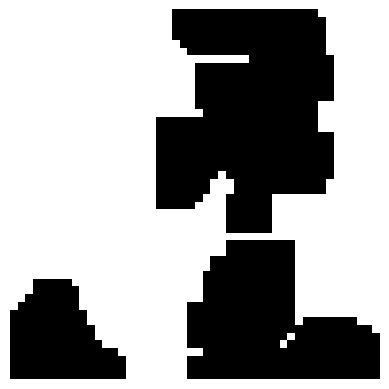

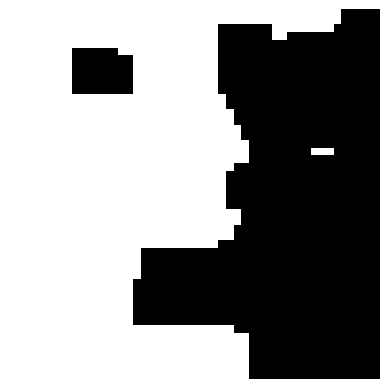

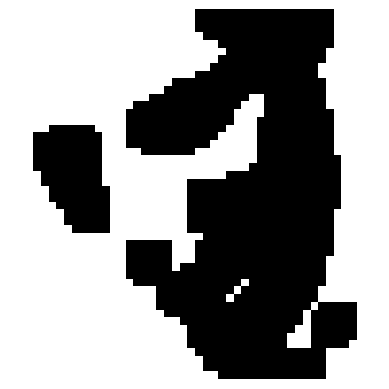

In [ ]:
import cv2
import numpy as np
import os
import math
import matplotlib.pyplot as plt

# Path to the dataset directory
dataset_path = "/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set"

# Load the dataset
X_train_rgb = []
X_test_rgb = []

# Iterate over each label in the dataset
labels = os.listdir(dataset_path)
for label in labels:
    label_path = os.path.join(dataset_path, label)

    # Iterate over each image in the label folder
    for filename in os.listdir(label_path):
        # Construct the full image path
        image_path = os.path.join(label_path, filename)

        # Load the image
        image = cv2.imread(image_path)

        # Split the dataset into training and testing sets
        if np.random.rand() < 0.8:
            X_train_rgb.append(image)
        else:
            X_test_rgb.append(image)

# Convert lists to NumPy arrays
X_train_rgb = np.array(X_train_rgb)
X_test_rgb = np.array(X_test_rgb)

# Melakukan segmentasi menggunakan metode Otsu
def segment_images(images):
    segmented_images = []
    for image in images:
        # Konversi ke citra grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Segmentasi menggunakan metode Otsu
        _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Operasi morfologi
        kernel = np.ones((5, 5), np.uint8)
        morph_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

        segmented_images.append(morph_image)

    return np.array(segmented_images)

X_train_segmented = segment_images(X_train_rgb)
X_test_segmented = segment_images(X_test_rgb)

# Menampilkan gambar hasil segmentasi
def show_segmented_images(images):
    num_examples = len(images)
    num_cols = 1
    num_rows = math.ceil(num_examples / num_cols)

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 16))

    for i, image in enumerate(images):
        row = i // num_cols
        col = i % num_cols

        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Menampilkan gambar hasil segmentasi untuk 3 data latih
for i in range(3):
    plt.imshow(X_train_segmented[i], cmap='gray')
    plt.axis('off')
    plt.show()


**KLASIFIKASI PRA-PEMROSESAN PADA FITUR DAN LABEL MENGGUNAKAN HOG DAN MODEL SVM**

Accuracy: 44.04%
Precision: 43.26%
Recall: 44.04%


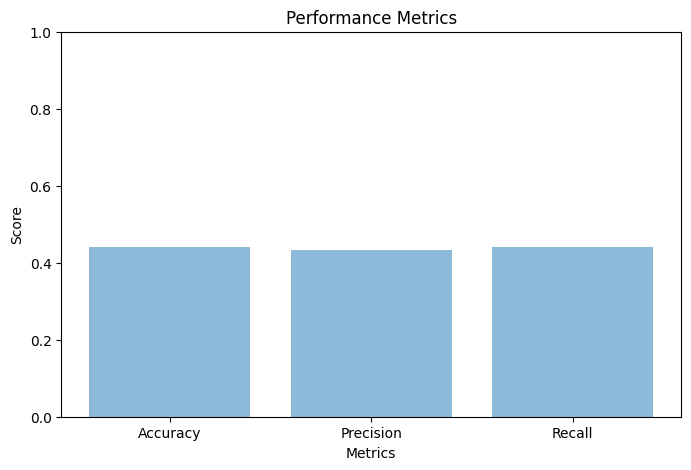

In [ ]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
import matplotlib.pyplot as plt

# Fungsi untuk melakukan ekstraksi ciri HOG pada gambar
def extract_hog_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True)
    return hog_features

# Load dataset
dataset_path = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'  # Ganti dengan path folder dataset Anda
labels = []
dataset = []

# Loop melalui setiap label dan gambar dalam dataset
for label in ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']:
    label_path = os.path.join(dataset_path, label)
    image_files = os.listdir(label_path)
    for image_file in image_files:
        image_path = os.path.join(label_path, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            features = extract_hog_features(image)
            dataset.append(features)
            labels.append(label)

# Konversi label menjadi angka menggunakan LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)

# Latih model SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi menggunakan model yang telah dilatih
y_pred = svm_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

# Visualisasi grafik
labels = label_encoder.classes_
metrics = [accuracy, precision, recall]
x = np.arange(len(metrics))

plt.figure(figsize=(8, 5))
plt.bar(x, metrics, align='center', alpha=0.5)
plt.xticks(x, ['Accuracy', 'Precision', 'Recall'])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


Akurasi: 42.99%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       Anger       0.32      0.14      0.20       600
        Fear       0.34      0.23      0.27      1004
       Happy       0.49      0.67      0.57      1033
     Neutral       0.39      0.42      0.40       983
         Sad       0.34      0.32      0.33       983
    Surprise       0.52      0.68      0.59      1001

    accuracy                           0.43      5604
   macro avg       0.40      0.41      0.39      5604
weighted avg       0.41      0.43      0.41      5604



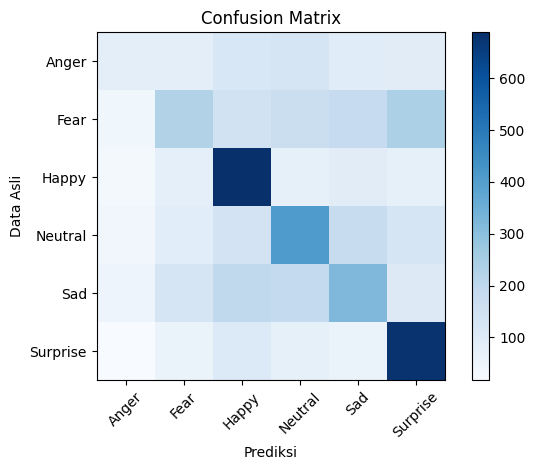

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage import feature
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Path ke direktori dataset
dataset_path = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'

# Daftar label
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# List untuk menyimpan fitur HOG dan label
features = []
labels_list = []

# Melakukan iterasi pada direktori dataset
for label in labels:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            image_path = os.path.join(label_path, file)
            image = io.imread(image_path, as_gray=True)
            hog_features = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True)
            features.append(hog_features)
            labels_list.append(label)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels_list, test_size=0.2, random_state=42)

# Melatih model SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred = svm_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)

# Membuat matriks kebingungan (confusion matrix)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)

# Membuat grafik matriks kebingungan
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Prediksi')
plt.ylabel('Data Asli')
plt.tight_layout()
plt.show()

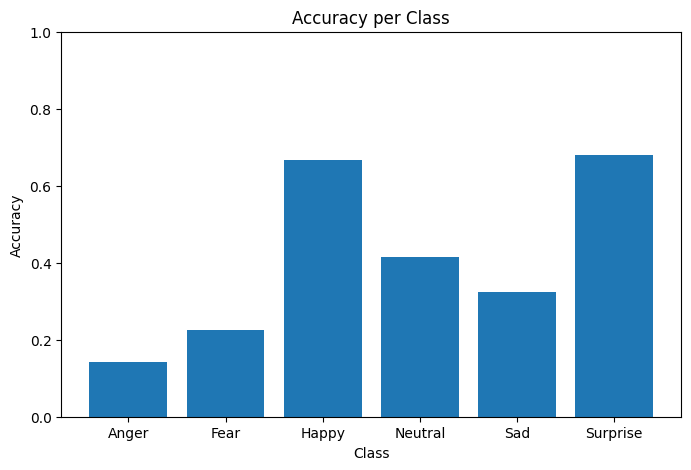

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Path ke direktori dataset
dataset_path = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set'

# Daftar label
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# List untuk menyimpan fitur HOG dan label
features = []
labels_list = []

# Melakukan iterasi pada direktori dataset
for label in labels:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            image_path = os.path.join(label_path, file)
            image = io.imread(image_path, as_gray=True)
            hog_features = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True)
            features.append(hog_features)
            labels_list.append(label)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels_list, test_size=0.2, random_state=42)

# Melatih model SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred = svm_model.predict(X_test)

# Menghitung akurasi untuk setiap kelas yang memiliki sampel dalam data uji
class_accuracy = {}
for label in labels:
    if label in y_test:
        indices = [i for i, y in enumerate(y_test) if y == label]
        class_accuracy[label] = accuracy_score(np.array(y_test)[indices], np.array(y_pred)[indices])
    else:
        class_accuracy[label] = 0.0

# Membuat grafik batang
plt.figure(figsize=(8, 5))
plt.bar(class_accuracy.keys(), class_accuracy.values())
plt.title('Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Code di bawah akan menampilkan contoh gambar yang dipilih secara acak dari data uji, beserta label prediksi yang diberikan oleh model SVM**

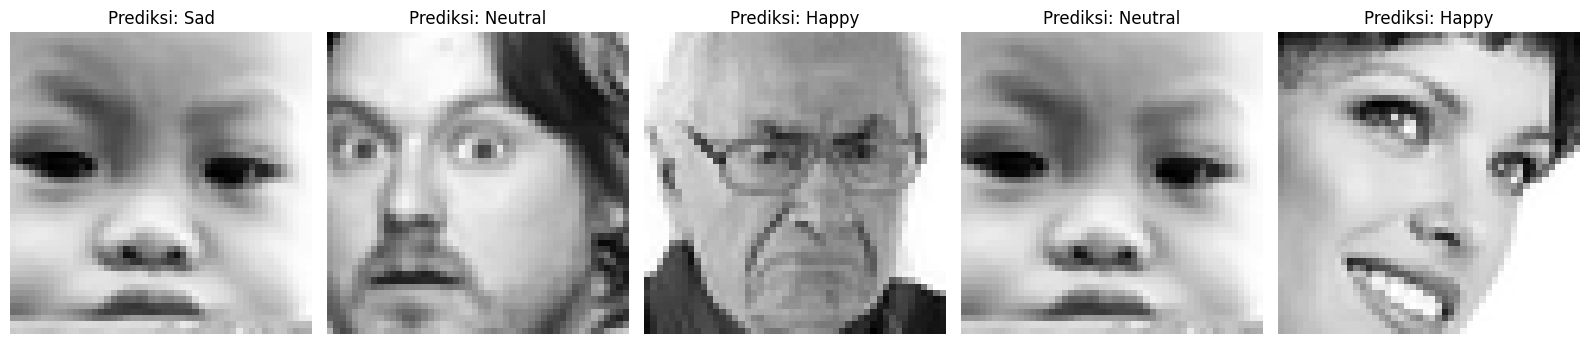

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from skimage import io
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
=
# Path ke direktori dataset=
dataset_path = '/content/drive/MyDrive/Kecerdasan-Tiruan/FP-Ketir/dataset/training_set='
=
# Daftar label=
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# List untuk menyimpan fitur HOG dan label
features = []
labels_list = []

# Melakukan iterasi pada direktori dataset
for label in labels:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            image_path = os.path.join(label_path, file)
            image = io.imread(image_path, as_gray=True)
            hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True)
            features.append(hog_features)
            labels_list.append(label)

# Mengubah label menjadi bilangan numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_list)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Melatih model SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred = svm_model.predict(X_test)

# Memilih secara acak indeks gambar dari data uji
num_examples = 5
random_indices = random.sample(range(len(X_test)), num_examples)

# Menampilkan contoh gambar yang dipilih secara acak dengan label prediksi
fig, axes = plt.subplots(nrows=1, ncols=num_examples, figsize=(16, 4))
for i, index in enumerate(random_indices):
    image = io.imread(os.path.join(dataset_path, labels[y_test[index]], os.listdir(os.path.join(dataset_path, labels[y_test[index]]))[0]))
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title("Prediksi: " + label_encoder.inverse_transform([y_pred[index]])[0])
    axes[i].axis('off')

plt.tight_layout()
plt.show()